In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [107]:
# reading of data
df = pd.read_csv("height-weight.csv")

In [108]:
df

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160
5,78,162
6,80,163
7,90,175
8,95,182
9,78,170


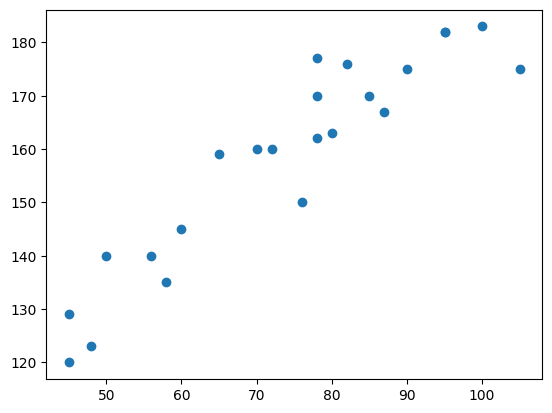

In [109]:
plt.scatter(df.Weight, df.Height) # show the liner relationship

In [110]:
# devide the data into x and y

X = df[["Weight"]]
y = df["Height"]

In [111]:
X,y

(    Weight
 0       45
 1       58
 2       48
 3       60
 4       70
 5       78
 6       80
 7       90
 8       95
 9       78
 10      82
 11      95
 12     105
 13     100
 14      85
 15      78
 16      50
 17      65
 18      76
 19      87
 20      45
 21      56
 22      72,
 0     120
 1     135
 2     123
 3     145
 4     160
 5     162
 6     163
 7     175
 8     182
 9     170
 10    176
 11    182
 12    175
 13    183
 14    170
 15    177
 16    140
 17    159
 18    150
 19    167
 20    129
 21    140
 22    160
 Name: Height, dtype: int64)

In [112]:
# Train test spilt
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3,random_state=1)

In [113]:
X_test

,Weight
20,45
17,65
3,60
13,100
19,87
16,50
10,82


In [114]:
# scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [115]:
# fit and transform for train data
X_train = scaler.fit_transform(X_train)
# transform for test data
X_test = scaler.transform(X_test)

In [116]:
X_train

array([[-0.33596868],
       [-1.6647437 ],
       [ 0.0264245 ],
       [ 0.26801996],
       [ 0.8720086 ],
       [-1.06075505],
       [ 0.57001428],
       [-1.84594029],
       [ 0.14722223],
       [-0.21517095],
       [-1.18155278],
       [ 0.14722223],
       [ 1.17400292],
       [ 1.77799157],
       [ 1.17400292],
       [ 0.14722223]])

In [117]:
X_test

array([[-1.84594029],
       [-0.637963  ],
       [-0.93995732],
       [ 1.47599724],
       [ 0.69081201],
       [-1.54394597],
       [ 0.38881769]])

In [118]:
y_test

20    129
17    159
3     145
13    183
19    167
16    140
10    176
Name: Height, dtype: int64

In [119]:
# train the model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [120]:
model

LinearRegression()

In [121]:
model.fit(X_train, y_train)

LinearRegression()

In [122]:
print("The coef is", model.coef_)
print("the intercept is",model.intercept_)

The coef is [17.96866211]
the intercept is 159.0


In [123]:
# equation
# y_pred = model.intercept_+model.coef_(x)
# = 159+17.96(x)

In [124]:
# predict 
model.predict(X_train)

array([152.96309227, 129.08678304, 159.47481297, 163.8159601 ,
       174.66882793, 139.93965087, 169.24239401, 125.83092269,
       161.64538653, 155.13366584, 137.76907731, 161.64538653,
       180.09526185, 190.94812968, 180.09526185, 161.64538653])

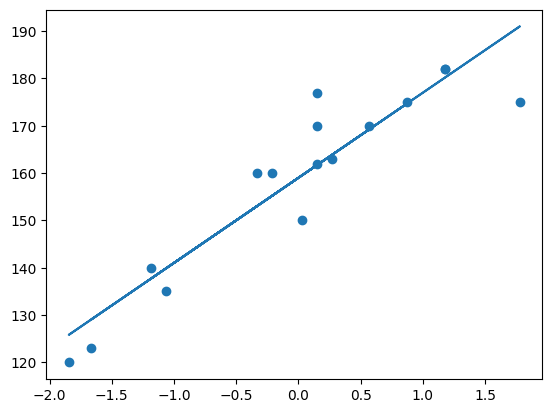

In [125]:
plt.scatter(X_train,y_train)
plt.plot(X_train,model.predict(X_train))

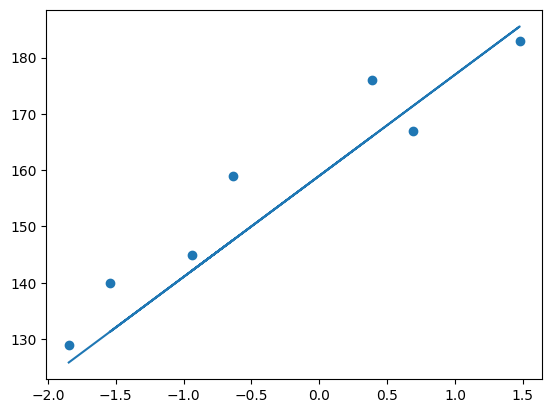

In [126]:
plt.scatter(X_test,y_test)
plt.plot(X_test,model.predict(X_test))

    evaluation matrix ~ Performance of Model

In [127]:


from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [128]:
y_pred_test = model.predict(X_test)

In [129]:
mse = mean_squared_error(y_test,y_pred_test)
mse

50.33408704814381

In [130]:
mae = mean_absolute_error(y_test,y_pred_test)
mae

6.173281083006771

In [131]:
# root mean squared error square root of mse
np.sqrt(mse)

7.09465200331516

In [132]:
r2_score(y_test,y_pred_test)# 85 % of y explained by x

0.850577349729853

In [133]:
# adjusted r square  = 1-(1-rsqaure)*n-1/n-p-1

In [134]:
score = r2_score(y_test,y_pred_test)

In [135]:
1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.8206928196758236

In [136]:
# if model has the difference b/w R square and adjusted R square is b/w 3 to 5 % it will be considered as good model

In [137]:
# trying to predict via this model for a new data set 
# in case of model was created using scaling we need to pass the test data with same scaling

X_new_test  = pd.read_csv("height-weight-new-data.csv")[["Weight"]]
type(X_new_test)

pandas.core.frame.DataFrame

In [138]:
X_new_test

,Weight
0,45
1,200


In [139]:
X_new_test = scaler.transform(X_new_test)

In [140]:
model.predict(X_new_test) # predicts the height according to weight given in the data set

array([125.83092269, 294.05037406])

In [141]:
print("load again123")

load again123
